In [90]:
import numpy as np
import pandas as pd
import sklearn
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
%matplotlib inline

In [91]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity='all'

In [92]:
df=pd.read_csv(r'C:\Users\gauth\Downloads\winequality-white.csv',sep=';')
df.head()
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
4893,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6
4894,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5
4895,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6
4896,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7
4897,6.0,0.21,0.38,0.8,0.020,22.0,98.0,0.98941,3.26,0.32,11.8,6


In [93]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,6.854788,0.278241,0.334192,6.391415,0.045772,35.308085,138.360657,0.994027,3.188267,0.489847,10.514267,5.877909
std,0.843868,0.100795,0.121020,5.072058,0.021848,17.007137,42.498065,0.002991,0.151001,0.114126,1.230621,0.885639
min,3.800000,0.080000,0.000000,0.600000,0.009000,2.000000,9.000000,0.987110,2.720000,0.220000,8.000000,3.000000
25%,6.300000,0.210000,0.270000,1.700000,0.036000,23.000000,108.000000,0.991723,3.090000,0.410000,9.500000,5.000000
50%,6.800000,0.260000,0.320000,5.200000,0.043000,34.000000,134.000000,0.993740,3.180000,0.470000,10.400000,6.000000
75%,7.300000,0.320000,0.390000,9.900000,0.050000,46.000000,167.000000,0.996100,3.280000,0.550000,11.400000,6.000000
max,14.200000,1.100000,1.660000,65.800000,0.346000,289.000000,440.000000,1.038980,3.820000,1.080000,14.200000,9.000000


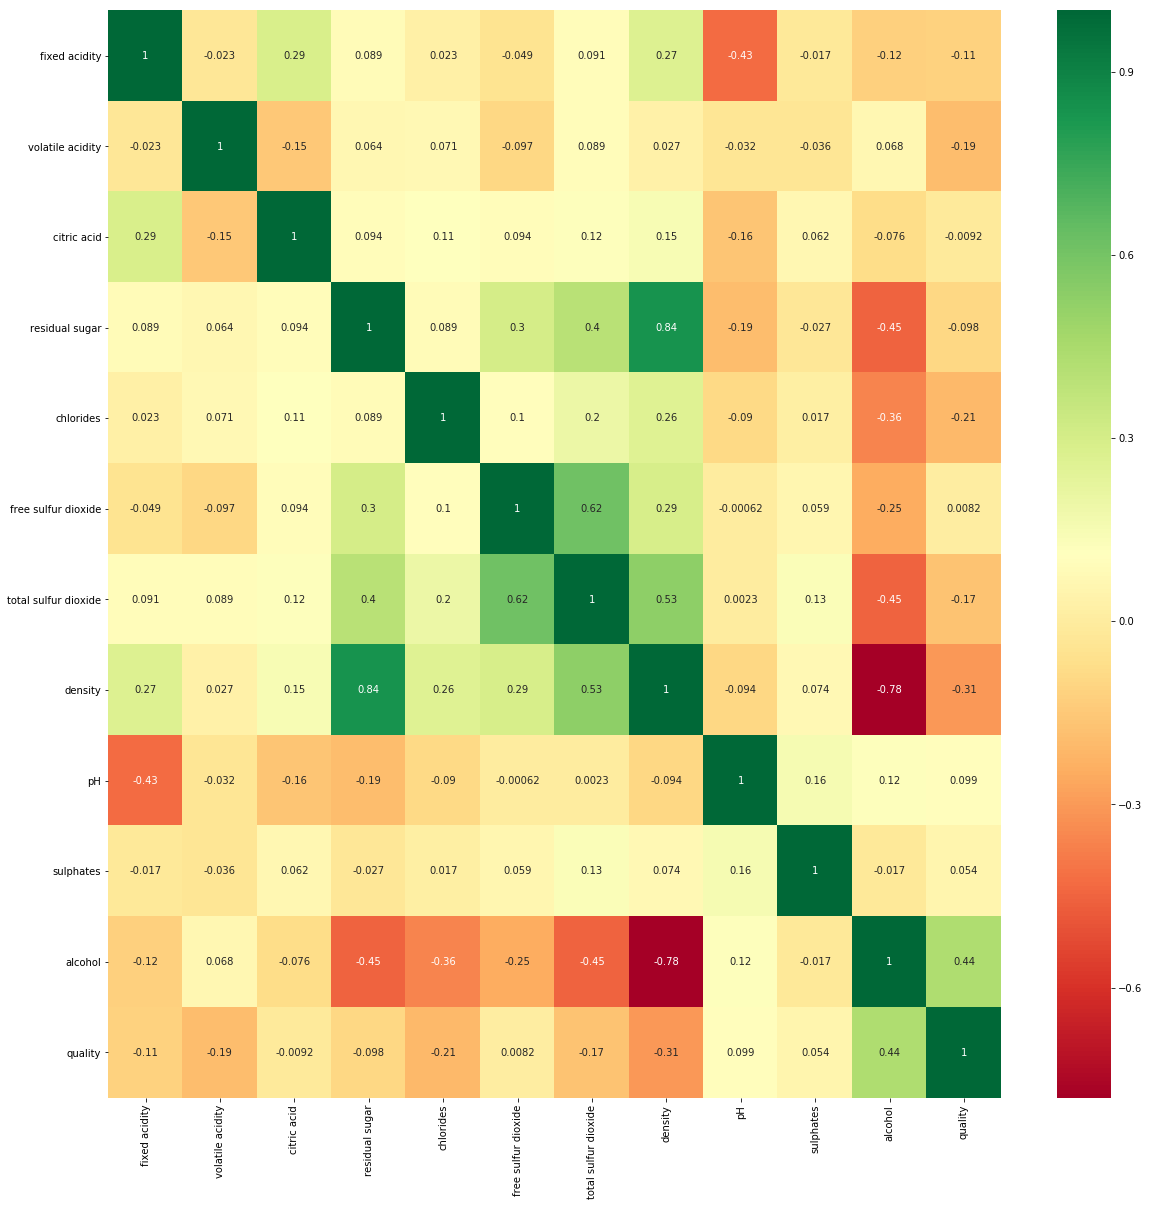

In [94]:
x=df.corr()
plt.subplots(figsize=(20,20))
sns.heatmap(x,cmap='RdYlGn',annot=True)
plt.show();

In [95]:
y=df.quality
x=df.drop('quality',axis=1)
y.head(1)
x.head(1)

0    6
Name: quality, dtype: int64

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.001,3.0,0.45,8.8


In [96]:
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,random_state=1)
train_x.shape
train_y.shape
test_x.shape
test_y.shape

(3428, 11)

(3428,)

(1470, 11)

(1470,)

In [97]:
# Scale atL values between and 1 
from sklearn. preprocessing import StandardScaler 
sc=StandardScaler()
arr_scld= sc.fit_transform(train_x)
train_xsc=pd.DataFrame(arr_scld,columns=train_x.columns) 

In [98]:
ln.fit(train_xsc,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [99]:
from sklearn.linear_model import LinearRegression
ln=LinearRegression()

In [100]:
ln.fit(train_xsc,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [101]:
df_m=pd.DataFrame({'features':x.columns,"coeff":ln.coef_})

In [102]:
df_m.sort_values(by=['coeff'])

,features,coeff
7,density,-0.403213
1,volatile acidity,-0.203531
4,chlorides,-0.011096
2,citric acid,0.000351
6,total sulfur dioxide,0.001829
0,fixed acidity,0.042197
5,free sulfur dioxide,0.049761
9,sulphates,0.065533
8,pH,0.094768
10,alcohol,0.268394


<function matplotlib.pyplot.show(*args, **kw)>

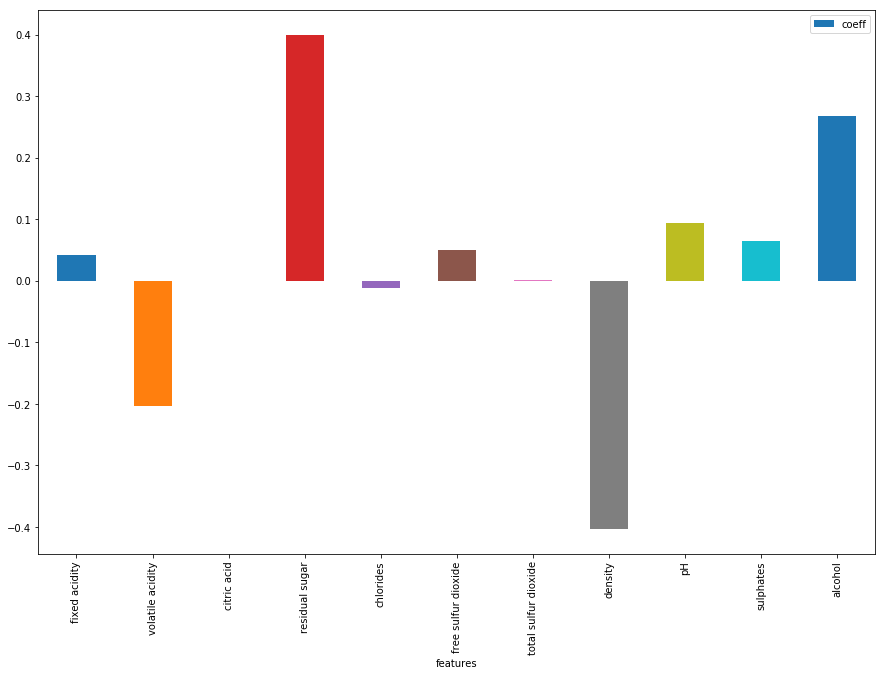

In [103]:
df_m.plot(x='features',y='coeff',kind='bar',figsize=(15,10))
plt.show


In [110]:
ln.fit(train_x,train_y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [111]:
print("R square value for regression test data is")
np.round(ln.score(test_x,test_y)*100,2)

R square value for regression test data is


27.6

In [113]:
print("R square value for regression train data is")
np.round(ln.score(train_x,train_y)*100,2)

R square value for regression train data is


28.29

In [114]:
predict_test_ln=ln.predict(test_x)

In [115]:
from sklearn import metrics
print("simple linear regression Mean square error(MSE) for test data is: ")
np.round(metrics.mean_squared_error(test_y,predict_test_ln),2)

simple linear regression Mean square error(MSE) for test data is: 


0.54

In [116]:
from sklearn.metrics import mean_absolute_error
print("simple linear regression absolute error(mae) for Test data is:")
np.round(metrics.mean_absolute_error(test_y,predict_test_ln),2)

simple linear regression absolute error(mae) for Test data is:


0.58